# Compare PCA vs. Machine learning clustering methods

One of the problems with clustering methods is how to handle missing data. In the case in PCA clustering methods, missing data are often treated as 0 (homozygous) which may skew results. However, using scikit-learn we can cluster data with "missing data" instead of assigning 0 to the missing data. I am currently working on comparing those two methods. Here are 3 steps for the comparison.

In [78]:
### Step 1: 
# Do PCA to get data in 2-dimensions
# plot scatterplot with no color

In [79]:
### Step 2: 
# Do Kmeans clustering to assign label to n-points
# plot scatterplot of PCA with color labels

In [80]:
### Step 3: 
# update Kmeans iteratively imputing missing data
# and update PCA with imputing missing data
# plot that.

## Step 1: 
* Make PCA to get data in 2-dimensions
* Plot scatterplot with no color

In [56]:
>>> import numpy as np
>>> from sklearn.decomposition import PCA
X = np.zeros((12, 10), dtype=int)
X[:5, :5] = 2
X[5:7, 5:7] = 2
X[7:, 7:] = 2
X

array([[2, 2, 2, 2, 2, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 2, 2, 2]])

[Importance of Feature Scaling](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)

In [64]:
Y = pca.fit_transform(X)
Y

array([[ 3.16227766e+00, -9.12870929e-01],
       [ 3.16227766e+00, -9.12870929e-01],
       [ 3.16227766e+00, -9.12870929e-01],
       [ 3.16227766e+00, -9.12870929e-01],
       [ 3.16227766e+00, -9.12870929e-01],
       [-3.16227766e+00, -9.12870929e-01],
       [-3.16227766e+00, -9.12870929e-01],
       [-3.16227766e+00, -9.12870929e-01],
       [-3.16227766e+00, -9.12870929e-01],
       [-3.16227766e+00, -9.12870929e-01],
       [ 3.60822483e-15,  4.56435465e+00],
       [ 3.60822483e-15,  4.56435465e+00]])

In [65]:
import toyplot

In [66]:
toyplot.scatterplot(Y[:, 0], Y[:, 1], width=400, height=400, size=10);

-2 0 2 0 2 4

In [79]:
XX = np.zeros((12, 15), dtype=int)
XX[1:5, 1:5] = 2
XX[1:1] = 1
XX[5:10, 5:10] = 2
XX[10:, 10:] = 2
XX

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2]])

In [76]:
pca = PCA(n_components=2)
pca.fit(XX)
YY = pca.fit_transform(XX)
YY
toyplot.scatterplot(YY[:, 0], YY[:, 1], width=400, height=400, size=10);

-2 0 2 5 8 -2 0 2 4

### Step 2: 
* Do Kmeans clustering to assign label to n-points

* Plot scatterplot of PCA with color labels

Resources:
https://stackoverflow.com/questions/35611465/python-scikit-learn-clustering-with-missing-data

In [8]:
import numpy as np
from sklearn.cluster import KMeans

In [9]:
def kmeans_missing(X, n_clusters, max_iter=10):
    """Perform K-Means clustering on data with missing values.

    Args:
      X: An [n_samples, n_features] array of data to cluster.
      n_clusters: Number of clusters to form.
      max_iter: Maximum number of EM iterations to perform.

    Returns:
      labels: An [n_samples] vector of integer labels.
      centroids: An [n_clusters, n_features] array of cluster centroids.
      X_hat: Copy of X with the missing values filled in.
    """

    # Initialize missing values to their column means
    missing = ~np.isfinite(X)  #Test element-wise for finiteness (not infinity or not Not a Number).
    mu = np.nanmean(X, 0, keepdims=1) #Compute the arithmetic mean along the specified axis, ignoring NaNs. Returns the average of the array elements (each column).
    X_hat = np.where(missing, mu, X) # numpy.where(condition[,x,y]) condition: when True, yield  x otherwise yeid y

    for i in range(max_iter):
        if i > 0:
            # initialize KMeans with the previous set of centroids. this is much
            # faster and makes it easier to check convergence (since labels
            # won't be permuted on every iteration), but might be more prone to
            # getting stuck in local minima.
            cls = KMeans(n_clusters, init=prev_centroids)
        else:
            # do multiple random initializations in parallel
            cls = KMeans(n_clusters, n_jobs=-1)

        # perform clustering on the filled-in data
        labels = cls.fit_predict(X_hat)
        centroids = cls.cluster_centers_

        # fill in the missing values based on their cluster centroids
        X_hat[missing] = centroids[labels][missing]

        # when the labels have stopped changing then we have converged
        if i > 0 and np.all(labels == prev_labels):
            break

        prev_labels = labels
        prev_centroids = cls.cluster_centers_

    return labels, centroids, X_hat

In [49]:
~np.isfinite(X)

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [50]:
np.isfinite(X)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       ...,
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [46]:
np.nanmean(X, 0, keepdims=1)

array([[-0.11221241,  4.97214243,  1.2621352 ]])

In [43]:
X_hat

array([[-0.11270647, -1.75893167,  3.55693097],
       [-5.16139863,  5.97147141,  1.41366354],
       [ 0.81370155,  4.45529447, -0.15913157],
       ...,
       [-1.998426  ,  6.63453301,  0.58752168],
       [-1.54795944,  4.91404264,  9.61990949],
       [ 3.12353563,  4.45529447,  2.01172852]])

"n statistics, an expectation–maximization (EM) algorithm is an iterative method to find maximum likelihood or maximum a posteriori (MAP) estimates of parameters in statistical models, where the model depends on unobserved latent variables. The EM iteration alternates between performing an expectation (E) step, which creates a function for the expectation of the log-likelihood evaluated using the current estimate for the parameters, and a maximization (M) step, which computes parameters maximizing the expected log-likelihood found on the E step. These parameter-estimates are then used to determine the distribution of the latent variables in the next E step." From Wikipedia, the free encyclopedia

In [26]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def make_fake_data(
    fraction_missing, 
    n_clusters=3, 
    n_samples=12,
    n_features=1000, 
    seed=None):
    
    # complete data
    gen = np.random.RandomState(seed)
    M, true_labels = make_blobs(n_samples, n_features, n_clusters, random_state=gen)
    
    # with missing values
    missing = gen.rand(*M.shape) < fraction_missing
    Xm = np.where(missing, np.nan, M)
    return M, true_labels, Xm
M, true_labels, Xm = make_fake_data(fraction_missing=0.3, n_clusters=5, seed=0)

In [27]:
M

array([[-3.67718512e+00,  2.92007016e+00, -6.77300416e+00, ...,
        -5.25701050e+00, -1.98872504e+00,  9.15266098e+00],
       [ 6.34167058e+00,  7.31334753e-01,  5.79003140e-03, ...,
        -2.81164148e+00,  6.07704372e+00,  3.49537893e+00],
       [-4.45633557e-01,  3.36777783e+00,  1.85871028e+00, ...,
         9.48136075e+00, -4.10709208e+00,  3.85393230e+00],
       ...,
       [ 6.51388358e+00, -1.73757187e+00,  8.26150839e-01, ...,
        -3.13650958e+00,  6.08824821e+00,  2.40920304e+00],
       [ 2.13767317e+00, -1.07694952e+01,  9.05300803e-01, ...,
         8.42633198e-01,  3.04772702e+00,  2.02236087e+00],
       [-1.11195434e-01,  4.25224839e+00,  2.26139732e+00, ...,
         8.09118956e+00, -5.46138223e+00,  3.58526365e+00]])

/Users/teachinghouse/miniconda/envs/py36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


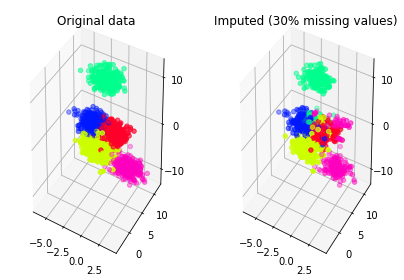

In [41]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def make_fake_data(fraction_missing, n_clusters=5, n_samples=1500,
                   n_features=3, seed=None):
    # complete data
    gen = np.random.RandomState(seed)
    X, true_labels = make_blobs(n_samples, n_features, n_clusters,
                                random_state=gen)
    # with missing values
    missing = gen.rand(*X.shape) < fraction_missing   #rand Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).
    Xm = np.where(missing, np.nan, X) #numpy.where：Return elements, either from x or y, depending on condition.
    return X, true_labels, Xm


X, true_labels, Xm = make_fake_data(fraction_missing=0.3, n_clusters=5, seed=0)
labels, centroids, X_hat = kmeans_missing(Xm, n_clusters=5) #Xm - a matrix is missing data

# plot the inferred points, color-coded according to the true cluster labels
fig, ax = plt.subplots(1, 2, subplot_kw={'projection':'3d', 'aspect':'equal'})
ax[0].scatter3D(X[:, 0], X[:, 1], X[:, 2], c=true_labels, cmap='gist_rainbow')
ax[1].scatter3D(X_hat[:, 0], X_hat[:, 1], X_hat[:, 2], c=true_labels,
                cmap='gist_rainbow')
ax[0].set_title('Original data')
ax[1].set_title('Imputed (30% missing values)')
fig.tight_layout()

### Generated fake geno file

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = np.array([
    [0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0], 
    [1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0], 
    [0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 1, 0], 
]).T
scaler.fit(X)
Xt = scaler.transform(X)
Xt

/Users/teachinghouse/miniconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.27475488,  0.        , -1.1       ],
       [-1.27475488, -1.27475488, -1.1       ],
       [-1.27475488, -1.27475488, -1.1       ],
       [ 0.        , -1.27475488, -1.1       ],
       [ 0.        ,  0.        ,  0.2       ],
       [ 0.        ,  0.        ,  0.2       ],
       [ 0.        ,  0.        ,  0.2       ],
       [ 1.27475488,  1.27475488,  1.5       ],
       [ 1.27475488,  1.27475488,  1.5       ],
       [ 1.27475488,  1.27475488,  0.2       ],
       [ 1.27475488,  1.27475488,  1.5       ],
       [ 0.        ,  0.        ,  0.2       ],
       [-1.27475488, -1.27475488, -1.1       ]])

In [13]:
X, true_labels, Xm = make_fake_data(fraction_missing=0.05)
labels, centroids, X_hat = kmeans_missing(Xt, 3)

NameError: name 'X1' is not defined

In [73]:
labels

array([1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1], dtype=int32)

In [43]:
#X, true_labels, Xm = make_fake_data(fraction_missing=0.3, n_clusters=5, seed=0)
#labels, centroids, X_hat = kmeans_missing(Xm, n_clusters=5)

ValueError: c of shape (12,) not acceptable as a color sequence for x with size 13, y with size 13

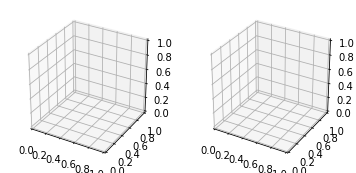

In [65]:
fig, ax = plt.subplots(1, 2, subplot_kw={'projection':'3d', 'aspect':'equal'})
ax[0].scatter3D(Xt[:, 0], Xt[:, 1], Xt[:, 2], c=true_labels, cmap='gist_rainbow')


ValueError: c of shape (12,) not acceptable as a color sequence for x with size 13, y with size 13

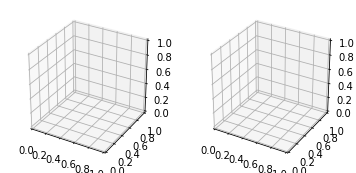

In [74]:
# plot the inferred points, color-coded according to the true cluster labels
fig, ax = plt.subplots(1, 2, subplot_kw={'projection':'3d', 'aspect':'equal'})
ax[0].scatter3D(Xt[:, 0], Xt[:, 1], Xt[:, 2], c=true_labels, cmap='gist_rainbow')
ax[1].scatter3D(Xt[:, 0], Xt[:, 1], Xt[:, 2], c=true_labels, cmap='gist_rainbow')
ax[0].set_title('Original data')
ax[1].set_title('Imputed (30% missing values)')
fig.tight_layout()

Automatically created module for IPython interactive environment


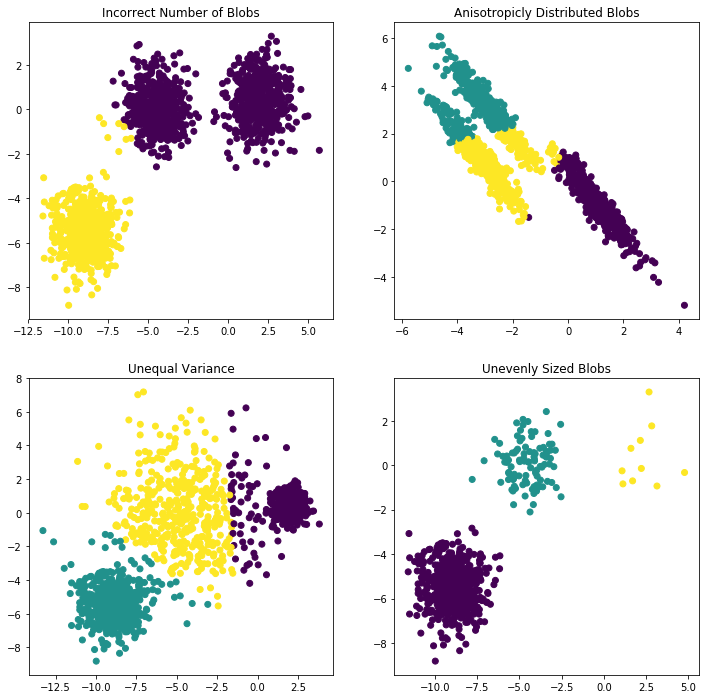

In [77]:
print(__doc__)

# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()
